# Activity: Explore probability distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this lab, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [2]:
# Import relevant libraries, packages, and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.
data = pd.read_csv("modified_c4_epa_air_quality.csv")


## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [5]:
# Display first 10 rows of the data.
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [6]:
# Display number of rows, number of columns.

data.shape


(260, 8)

Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

Text(0.5, 1.0, 'aqi_log histogram')

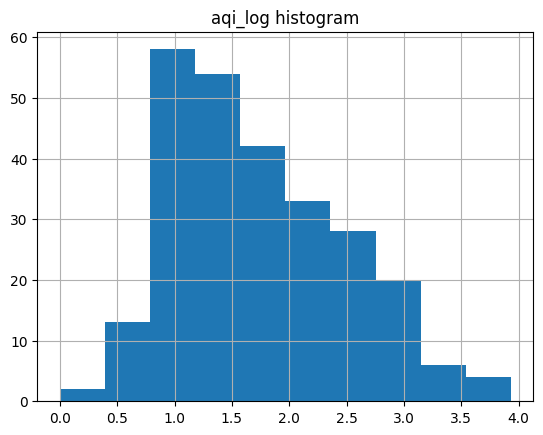

In [15]:
# Create a histogram to visualize distribution of aqi_log.

data['aqi_log'].hist()
plt.title('aqi_log histogram')

**Question:** What do you observe about the shape of the distribution from the histogram? 

**Answer:** The data has a right skew but it could be assumed to have gaussian distribution. Further tests will need to be performed to verify if this is the case. 

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [16]:
# Define variable for aqi_log mean.
aqi_log_mean = data['aqi_log'].mean()

# Print out the mean.
aqi_log_mean

1.7669210929985582

In [18]:
# Define variable for aqi_log standard deviation.
aqi_log_std = data['aqi_log'].std()

# Print out the standard deviation.
aqi_log_std

0.7147155520223721

Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [22]:
# Define variable for lower limit, 1 standard deviation below the mean.
low_1_std_limit = aqi_log_mean - aqi_log_std

# Define variable for upper limit, 1 standard deviation above the mean.
high_1_std_limit = aqi_log_mean + aqi_log_std

# Display lower_limit, upper_limit.
print(low_1_std_limit)
print(high_1_std_limit)

1.052205540976186
2.4816366450209304


In [30]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.

((data['aqi_log'] >= low_1_std_limit) & (data['aqi_log']<= high_1_std_limit)).mean() * 100


76.15384615384615

Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [31]:
# Define variable for lower limit, 2 standard deviations below the mean.
low_2_std_limit =aqi_log_mean - 2 * aqi_log_std

# Define variable for upper limit, 2 standard deviations above the mean.
high_2_std_limit = aqi_log_mean + 2 * aqi_log_std

# Display lower_limit, upper_limit.
print(low_2_std_limit, high_2_std_limit)



0.3374899889538139 3.1963521970433026


In [32]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.

((data['aqi_log'] >= low_2_std_limit) & (data['aqi_log'] <= high_2_std_limit)).mean() * 100


95.76923076923077

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [34]:
# Define variable for lower limit, 3 standard deviations below the mean.
low_3_std_limit =aqi_log_mean - 3 * aqi_log_std

# Define variable for upper limit, 3 standard deviations above the mean.
high_3_std_limit = aqi_log_mean + 3 * aqi_log_std

# Display lower_limit, upper_limit.
print(low_3_std_limit, high_3_std_limit)


-0.37722556306855815 3.9110677490656744


In [36]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.

((data['aqi_log'] >= low_3_std_limit) & (data['aqi_log'] <= high_3_std_limit)).mean() * 100


99.61538461538461

## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 

* About 76.15% of the data are within 1 S.D. of the mean, and 95.77% and 99.62% are within 2 and 3 S.D. from the mean, respectively. By using the empirical rule, we can assume that the data is approximately normally distributed. 

**Question:** How would you use z-score to find outliers? 

* Any data that lie beyond 3 S.D. from the mean - that is 3 Z from the mean -, may be considered as outliers.

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [38]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
data['z_score'] = stats.zscore(data['aqi_log'])

# Display the first 5 rows to ensure that the new column was added.
data.head()



,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [41]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
data[abs(data['z_score']> 3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


**Question:** What do you observe about potential outliers based on the calculations?


* The `aqi_log` for West Phoenix is somewehat above 3 S.D. from the mean. This implies that it's air quality is worse relative to the rest of the sites represented in the data.

**Question:** Why is outlier detection an important part of this project? 

* Outlier detection will allow identification of any sites which have unusual air quality index values. These could stem from incorrectly input data, or alternatively, highlight the most affected sites and therefore the ones requiring focus for improvement. For example, if the `aqi_log` for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

* Histogram plotting allows to visually check if the data seems to have normal distribution.
* The empyrical rule can be used to verify if the distribution of the data relative to its mean is indeed approximately normal.
* Normality testing relies on knowing the mean and the S.D. of the data in question
* Z-scores allow to identify potential outliers in the data

**What summary would you provide to stakeholders? Consider the distribution of the data and which sites would benefit from additional research.**

* The distribution of log_aqi data is approximately normal. 
* Using Z-score metrics, it was observed that the West Phoenix site has an outlier `aqi_log` index, meaning it has worse air quality.
* Further information should be gathered to determine if indeed West Phoenix has an air quality problem and if so, identify interventions towards improving its air quality. 

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 